
Name : Siddharth Pawar

NUID : 002225020
Assignment 1 : ML Data Cleaning and Feature Selection

**Abstract**

GrubHub, a leading online food delivery and takeout platform, has transformed the culinary landscape by seamlessly connecting diners with an extensive network of restaurants. The aim of this Notebook is to check the data quality and determine the significant features that result in variation of review_ratings of GrubHub. We will do so by answering the set of questions below:

What are the data types? (Only numeric and categorical)

Are there missing values?

What are the likely distributions of the numeric variables?

Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

Which independent variables have missing data? How much?

Do the training and test sets have the same data?

In the predictor variables independent of all the other predictor variables?

Which predictor variables are the most important?

Do the ranges of the predictor variables make sense?

What are the distributions of the predictor variables?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving grubhub.csv to grubhub.csv


In [3]:
df = pd.read_csv('/content/grubhub.csv')

In [ ]:
df.head(10)

,searched_zipcode,searched_lat,searched_lng,searched_address,searched_state,searched_city,searched_metro,is_gh,latitude,longitude,...,delivery_fee,delivery_time_raw,delivery_time,service_fee,phone,review_count,review_rating,RunDate,restaurant_tags,delivery_type
0,11216,40.678832,-73.950677,"300 Madison St, Brooklyn, NY 11216, USA",NY,Brooklyn,NY,$0 with GH+,40.678829,-73.949867,...,0.00,35-45,40.0,0.00,3476278080,1691,4.57,2022-04-25 07:01:11,"[""PRICING_ELIGIBLE_FOR_STANDARD_ORDER"", ""SUBSC...",SELF
1,11216,40.678832,-73.950677,"300 Madison St, Brooklyn, NY 11216, USA",NY,Brooklyn,NY,$0 with GH+,40.678715,-73.949875,...,0.00,35-55,45.0,0.00,7188577011,697,4.77,2022-04-25 07:01:11,"[""PRICING_ELIGIBLE_FOR_STANDARD_ORDER"", ""SUBSC...",SELF
2,11216,40.678832,-73.950677,"300 Madison St, Brooklyn, NY 11216, USA",NY,Brooklyn,NY,$0 with GH+,40.678879,-73.949448,...,1.99,20-35,27.5,10.00,7186223222,11,3.67,2022-04-25 07:01:11,"[""SUBSCRIPTION_ELIGIBLE_FOR_STANDARD_ORDER""]",GRUBHUB
3,11216,40.678832,-73.950677,"300 Madison St, Brooklyn, NY 11216, USA",NY,Brooklyn,NY,$0 with GH+,40.678638,-73.949463,...,1.99,25-35,30.0,7.25,3472408610,208,4.05,2022-04-25 07:01:11,"[""PRICING_ELIGIBLE_FOR_STANDARD_ORDER"", ""SUBSC...",GRUBHUB
4,11216,40.678832,-73.950677,"300 Madison St, Brooklyn, NY 11216, USA",NY,Brooklyn,NY,$0 with GH+,40.678226,-73.949440,...,1.99,20-40,30.0,5.25,7188726299,0,0.00,2022-04-25 07:01:11,"[""SUBSCRIPTION_ELIGIBLE_FOR_STANDARD_ORDER"", ""...",GRUBHUB
5,10003,40.732473,-73.987380,"41 Cooper Square, 7 E 7th St, New York, NY 100...",NY,New York,NY,$0 with GH+,40.732300,-73.987343,...,0.00,35-55,45.0,0.00,2128449789,347,4.60,2022-04-25 07:01:11,"[""PRICING_ELIGIBLE_FOR_STANDARD_ORDER"", ""SUBSC...",SELF
6,11216,40.678832,-73.950677,"300 Madison St, Brooklyn, NY 11216, USA",NY,Brooklyn,NY,$0 with GH+,40.678226,-73.949440,...,2.50,65-80,72.5,0.00,7188726299,40,4.40,2022-04-25 07:01:11,"[""SUBSCRIPTION_ELIGIBLE_FOR_STANDARD_ORDER""]",SELF
7,10003,40.732473,-73.987380,"41 Cooper Square, 7 E 7th St, New York, NY 100...",NY,New York,NY,$0 with GH+,40.732382,-73.988097,...,0.00,35-50,42.5,0.00,2123889755,6290,4.89,2022-04-25 07:01:11,"[""PRICING_ELIGIBLE_FOR_STANDARD_ORDER"", ""SUBSC...",SELF
8,11216,40.678832,-73.950677,"300 Madison St, Brooklyn, NY 11216, USA",NY,Brooklyn,NY,$0 with GH+,40.678226,-73.949440,...,1.99,25-45,35.0,5.25,7188726299,0,0.00,2022-04-25 07:01:11,"[""SUBSCRIPTION_ELIGIBLE_FOR_STANDARD_ORDER"", ""...",GRUBHUB
9,10003,40.732473,-73.987380,"41 Cooper Square, 7 E 7th St, New York, NY 100...",NY,New York,NY,$0 with GH+,40.732822,-73.986809,...,3.25,45-60,52.5,0.00,6466924120,6,3.04,2022-04-25 07:01:11,"[""SUBSCRIPTION_ELIGIBLE_FOR_STANDARD_ORDER"", ""...",SELF


Original DATA

Total observations = 8088

Dependent Variable = review_rating

Numerical attributes = 14

Categorical attributes = 12

Dropping customer personal information

In [ ]:
df.drop(['phone', 'address'],axis=1,inplace= True)

In [ ]:
df.drop(['searched_lat', 'searched_address','loc_number','searched_lng', 'latitude', 'longitude', 'url', 'delivery_time_raw','delivery_fee_raw', 'RunDate'],axis=1,inplace= True)

Columns : "searched_lat", "searched_long","url","delivery_fee_raw","delivery_time_raw" will not be handy in predicting the dependent variable "review_rating" ; Hence we will remove thoise columns from the dataset.

In [ ]:
df.columns

Index(['searched_zipcode', 'searched_state', 'searched_city', 'searched_metro',
       'is_gh', 'distance', 'loc_name', 'cuisines', 'delivery_fee',
       'delivery_time', 'service_fee', 'review_count', 'review_rating',
       'restaurant_tags', 'delivery_type'],
      dtype='object')

In [ ]:
df.shape

(8088, 15)

# Q1. What are the data types?

In [ ]:
categorical_attributes = df.select_dtypes(exclude=[np.number]).columns.tolist()
print("The categoric datatypes are:", categorical_attributes)
numeric_attributes = df.select_dtypes(include=[np.number]).columns.tolist()
print("The numeric datatypes are:", numeric_attributes)

The categoric datatypes are: ['searched_state', 'searched_city', 'searched_metro', 'is_gh', 'loc_name', 'cuisines', 'restaurant_tags', 'delivery_type']
The numeric datatypes are: ['searched_zipcode', 'distance', 'delivery_fee', 'delivery_time', 'service_fee', 'review_count', 'review_rating']


Converting "is_gh" to a column indicating GrubHub premium users

In [ ]:
df.loc[df['is_gh'] != "$0 with GH+", 'is_gh'] = 0
df.loc[df['is_gh'] == "$0 with GH+", 'is_gh'] = 1


In [ ]:
df.head()

,searched_zipcode,searched_state,searched_city,searched_metro,is_gh,distance,loc_name,cuisines,delivery_fee,delivery_time,service_fee,review_count,review_rating,restaurant_tags,delivery_type
0,11216,NY,Brooklyn,NY,1,0.04,Chun Vegetarian,"[""Asian"", ""Vegan"", ""Vegetarian""]",0.00,40.0,0.00,1691,4.57,"[""PRICING_ELIGIBLE_FOR_STANDARD_ORDER"", ""SUBSC...",SELF
1,11216,NY,Brooklyn,NY,1,0.04,India House,"[""Healthy"", ""Indian"", ""Lunch Specials"", ""Veget...",0.00,45.0,0.00,697,4.77,"[""PRICING_ELIGIBLE_FOR_STANDARD_ORDER"", ""SUBSC...",SELF
2,11216,NY,Brooklyn,NY,1,0.06,Pattie Hut,"[""Chicken"", ""Soup"", ""Wings""]",1.99,27.5,10.00,11,3.67,"[""SUBSCRIPTION_ELIGIBLE_FOR_STANDARD_ORDER""]",GRUBHUB
3,11216,NY,Brooklyn,NY,1,0.07,Texas Chicken and Burgers,"[""Chicken"", ""Hamburgers"", ""Southern"", ""Wings""]",1.99,30.0,7.25,208,4.05,"[""PRICING_ELIGIBLE_FOR_STANDARD_ORDER"", ""SUBSC...",GRUBHUB
4,11216,NY,Brooklyn,NY,1,0.08,Grilled & Cheesy,"[""American"", ""Sandwiches""]",1.99,30.0,5.25,0,0.00,"[""SUBSCRIPTION_ELIGIBLE_FOR_STANDARD_ORDER"", ""...",GRUBHUB


Having "searched_zipcode", "searched_address" as 2 independent columns in the dataset can help us drop the columns of latitude and longitude. Location of the restaurant is a significant factor in customer reviews but location number doesn`t hold much potential in doing so.


# Q2. Are there any missing values?

In [ ]:
df.isnull().sum()

searched_zipcode     0
searched_state       0
searched_city        0
searched_metro       0
is_gh                0
distance             0
loc_name             0
cuisines             0
delivery_fee         0
delivery_time        0
service_fee          0
review_count         0
review_rating        0
restaurant_tags     22
delivery_type        0
dtype: int64

# Q3. What are the likely distributions of the numeric variables?

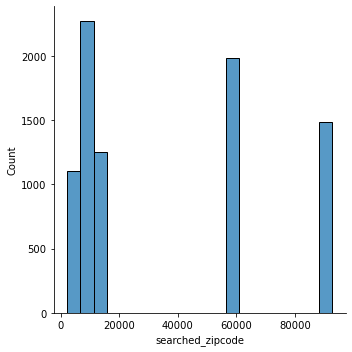

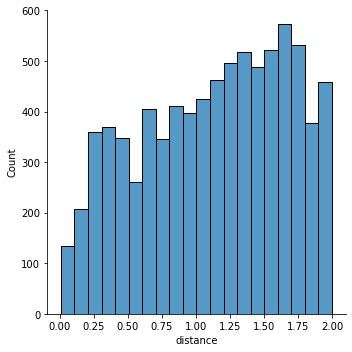

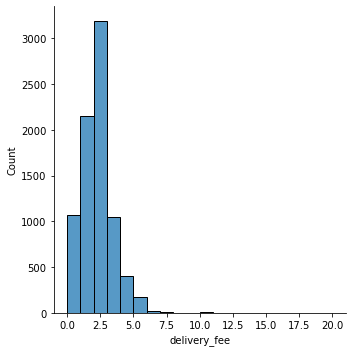

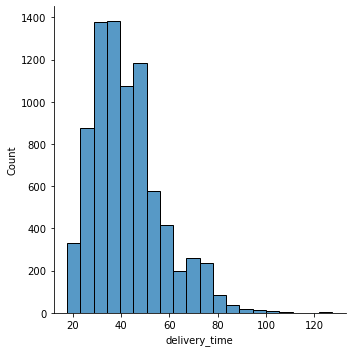

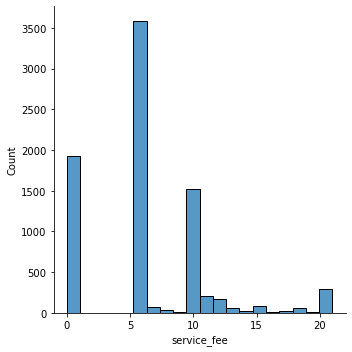

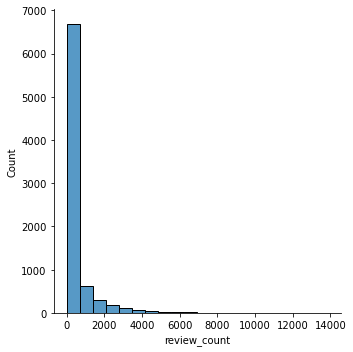

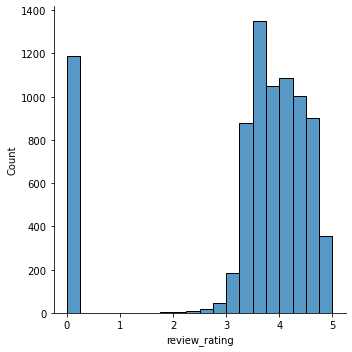

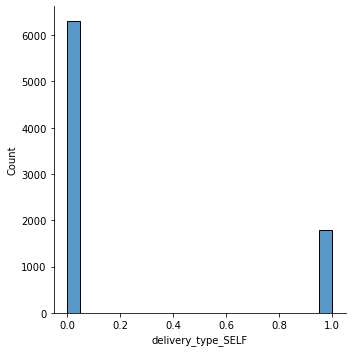

In [ ]:
import matplotlib.pyplot as plt
data_norm = df[numeric_attributes]
for c in data_norm.columns[:]:
    sns.displot(df, x=c, bins=20)

# Normalizing the dataset

In [ ]:

scaled_df = pd.DataFrame(d, columns=data_norm.columns)

In [ ]:
from sklearn import preprocessing
d = preprocessing.normalize(data_norm)

# Q4. Which independent variables are useful to predict a target (dependent variable)?

In [ ]:
scaled_df.corr()

,searched_zipcode,distance,delivery_fee,delivery_time,service_fee,review_count,review_rating,delivery_type_SELF
searched_zipcode,1.000000,-0.176169,-0.196454,-0.230451,-0.035307,-0.882746,-0.238533,-0.296813
distance,-0.176169,1.000000,0.915701,0.889786,0.686231,0.277676,0.827364,0.181474
delivery_fee,-0.196454,0.915701,1.000000,0.925606,0.701462,0.304310,0.856697,0.280876
delivery_time,-0.230451,0.889786,0.925606,1.000000,0.705096,0.362605,0.902637,0.319243
service_fee,-0.035307,0.686231,0.701462,0.705096,1.000000,0.094451,0.671435,-0.204874
review_count,-0.882746,0.277676,0.304310,0.362605,0.094451,1.000000,0.396355,0.426298
review_rating,-0.238533,0.827364,0.856697,0.902637,0.671435,0.396355,1.000000,0.285979
delivery_type_SELF,-0.296813,0.181474,0.280876,0.319243,-0.204874,0.426298,0.285979,1.000000


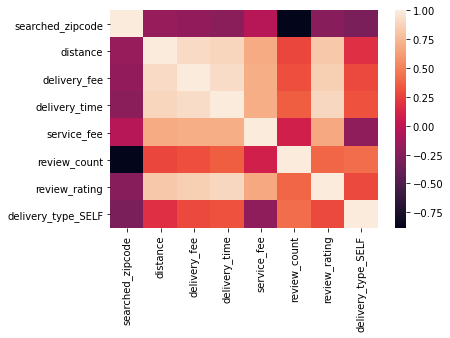

In [ ]:
sns.heatmap(scaled_df.corr());


# Q5. Which independent variables have missing data?

In [ ]:
#Rechecking null values
df.isnull().sum()

searched_zipcode       0
searched_state         0
searched_city          0
searched_metro         0
is_gh                  0
distance               0
loc_name               0
cuisines               0
delivery_fee           0
delivery_time          0
service_fee            0
review_count           0
review_rating          0
restaurant_tags       22
delivery_type_SELF     0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
from sklearn.impute import SimpleImputer

mode = SimpleImputer(strategy='most_frequent')
df['restaurant_tags'] = mode.fit_transform(df['restaurant_tags'].values.reshape(-1, 1))


**Verification for Cleaned & Preprocessed Data**

Total observations = 8088

Dependent Variable = review_rating

**1. Numerical attributes = 7 | Categorical attributes = 8**

**2. Are there any missing values? : No**

**4. Any independent variable has missing values? : No**

# Q6. Do the training and test sets have the same data?

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_df[numeric_attributes], scaled_df['review_rating'], test_size=0.30, random_state=42)

The training and test datasets have different values as the data is split.

# Q7. Are the predictor variables independent of all the other predictor variables?
Looking at the correlation matrix and the heatmap we conclude can that the predictor variables are independent of each other.

# Q8. Which predictor variables are most important
delivery_time and delivery_fee are the most important since they have the highest correlation with our dependent variable (review_rating)

In [ ]:
numeric_attributes = df.select_dtypes(include=['number']).columns

In [ ]:
for c in scaled_df.columns[:]:
    print(c)
    sns.boxplot(data=scaled_df, x=scaled_df[c], y= scaled_df['review_rating'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


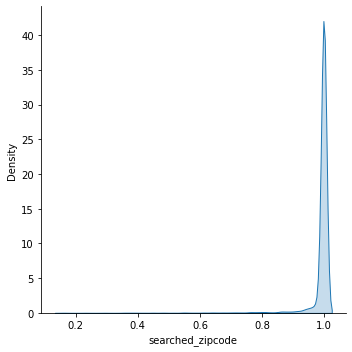

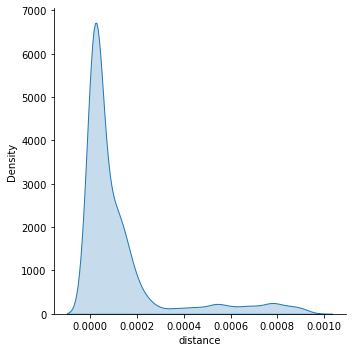

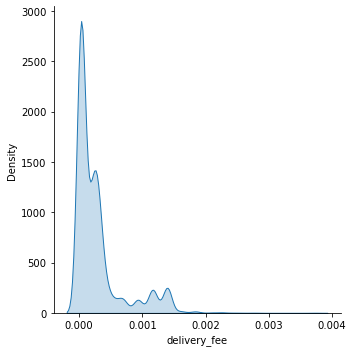

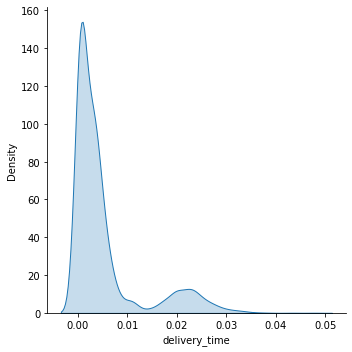

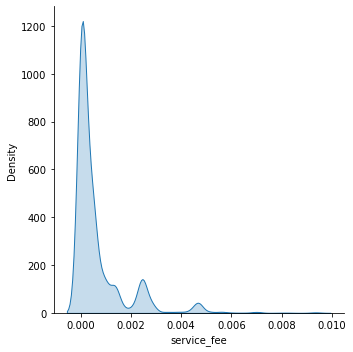

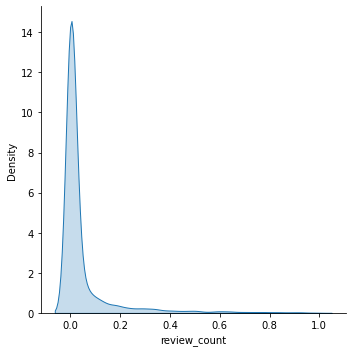

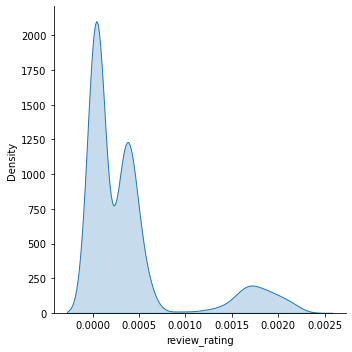

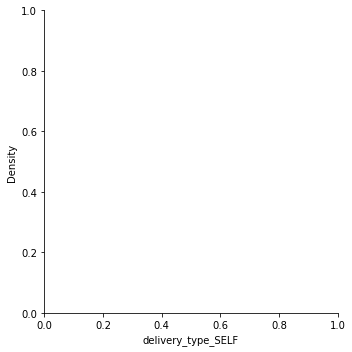

In [ ]:
for c in scaled_df.columns[:]:
    sns.displot(scaled_df, x=c, kind="kde", fill=True)

In [ ]:
scaled_df.columns

Index(['searched_zipcode', 'distance', 'delivery_fee', 'delivery_time',
       'service_fee', 'review_count', 'review_rating', 'delivery_type_SELF'],
      dtype='object')

# Removing the outliers using MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaledData = pd.DataFrame(scaler.fit_transform(scaled_df), columns=data_norm.columns)

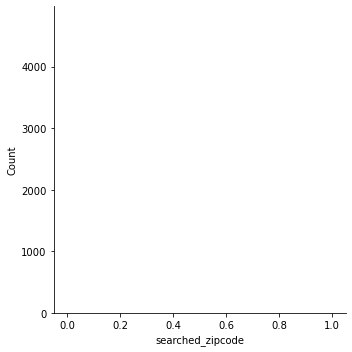

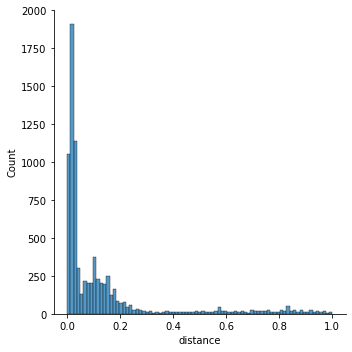

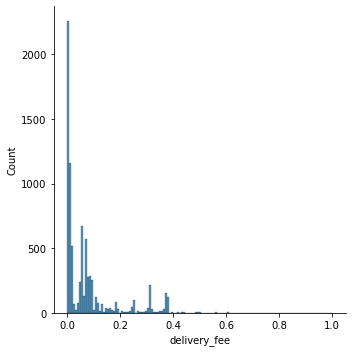

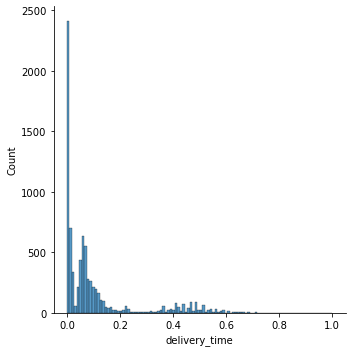

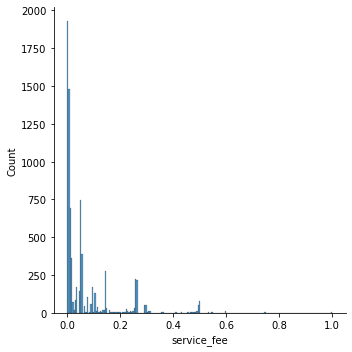

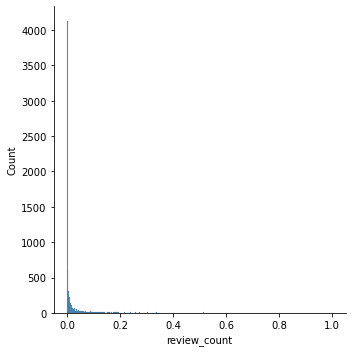

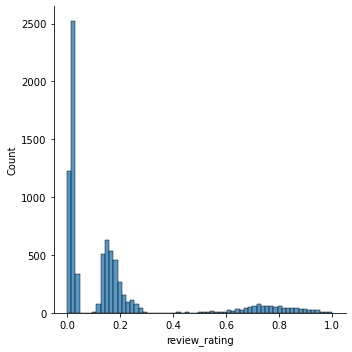

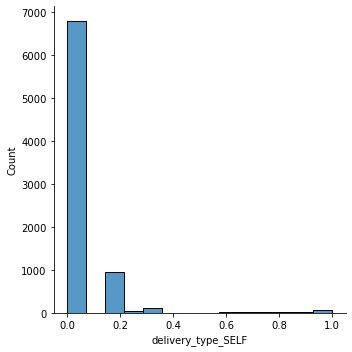

In [ ]:
for c in scaledData.columns[:]:
    sns.displot(scaledData, x=c)

# Running a linear regression model and calculating the accuracy


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
X= np.array(X_train['delivery_fee']).reshape(-1,1)
y= np.array(y_train).reshape(-1,1)
reg = LinearRegression().fit(X, y)
y_toPredict = np.array(y_test).reshape(-1,1)
y_pred = reg.predict(y_toPredict)

y_test=np.array(y_test).reshape(-1,1)
reg.score(np.array(X_test['delivery_fee']).reshape(-1,1), y_test)

0.7043654386093019